In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
df=pd.read_csv('Employers_data.csv')
df


,Employee_ID,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,1,Merle Ingram,24,Female,Engineering,Engineer,1,Master,Austin,90000
1,2,John Mayes,56,Male,Sales,Executive,33,Master,Seattle,195000
2,3,Carlos Wille,21,Male,Engineering,Intern,1,Bachelor,New York,35000
3,4,Michael Bryant,30,Male,Finance,Analyst,9,Bachelor,New York,75000
4,5,Paula Douglas,25,Female,HR,Analyst,2,Master,Seattle,70000
...,...,...,...,...,...,...,...,...,...,...
9995,9996,Thomas Rossin,51,Male,Sales,Executive,28,Master,Austin,185000
9996,9997,Christie King,36,Female,Sales,Executive,9,PhD,San Francisco,165000
9997,9998,Alfred Keller,57,Male,Sales,Executive,30,PhD,New York,200000
9998,9999,Margaret Gomez,37,Female,Engineering,Manager,14,Master,New York,135000


In [111]:
df.shape

(10000, 10)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Employee_ID       10000 non-null  int64 
 1   Name              10000 non-null  object
 2   Age               10000 non-null  int64 
 3   Gender            10000 non-null  object
 4   Department        10000 non-null  object
 5   Job_Title         10000 non-null  object
 6   Experience_Years  10000 non-null  int64 
 7   Education_Level   10000 non-null  object
 8   Location          10000 non-null  object
 9   Salary            10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


### Dropping Irrelevant Columns
- **Employee_ID** → unique identifier, no predictive power  
- **Name** → unique for each row, not useful for prediction  
- **Age** → redundant because we already have `Experience_Years`  
- **Gender** → dropped to avoid introducing bias  

In [113]:
df.drop(columns=["Employee_ID","Name","Age","Gender"], inplace=True)


In [114]:
df.head()

,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,Engineering,Engineer,1,Master,Austin,90000
1,Sales,Executive,33,Master,Seattle,195000
2,Engineering,Intern,1,Bachelor,New York,35000
3,Finance,Analyst,9,Bachelor,New York,75000
4,HR,Analyst,2,Master,Seattle,70000


In [115]:
df.isnull().sum()

Department          0
Job_Title           0
Experience_Years    0
Education_Level     0
Location            0
Salary              0
dtype: int64

In [116]:
df.duplicated().sum()

4808

### Handling Duplicates

- Initially, no duplicates existed because each row had a unique `Name`.  
- After dropping the `Name` column, some rows appeared as duplicates.  
- These are not true duplicates — they represent different employees who happen to share the same attributes (e.g., same department, job title, salary).  

Therefore, **we do not drop duplicates** after removing `Name`. Keeping them ensures that all employees are represented in the dataset.


In [159]:
df.describe()

,Experience_Years,Salary
count,10000.000000,10000.000000
mean,12.370900,115381.500000
std,9.148951,46066.139047
min,0.000000,25000.000000
25%,5.000000,70000.000000
50%,10.000000,120000.000000
75%,19.000000,150000.000000
max,37.000000,215000.000000


In [118]:
df['Department'].value_counts()

Department
Product        1724
Engineering    1683
Sales          1669
Marketing      1669
HR             1660
Finance        1595
Name: count, dtype: int64

In [131]:
df['Experience_Years'].value_counts()

Experience_Years
1     686
9     512
7     512
6     470
8     452
3     448
4     439
5     426
0     413
2     393
12    312
13    310
15    309
16    307
14    302
17    288
19    278
10    273
18    268
11    259
20    229
21    226
23    220
24    217
22    216
25    209
26    206
27    179
30     82
32     78
31     78
29     74
28     72
33     63
35     54
34     51
37     46
36     43
Name: count, dtype: int64

In [124]:
df['Job_Title'].value_counts()

Job_Title
Manager      3325
Analyst      2799
Executive    1921
Engineer     1375
Intern        580
Name: count, dtype: int64

In [119]:
df['Location'].value_counts()

Location
Austin           2034
Seattle          2017
Chicago          2008
New York         1980
San Francisco    1961
Name: count, dtype: int64

In [121]:
df.groupby("Location")["Salary"].mean().sort_values()


Location
Austin           113436.578171
Chicago          114569.223108
Seattle          115708.973723
San Francisco    116613.972463
New York         116648.989899
Name: Salary, dtype: float64

### dropping "location" column

Salaries do vary by city, but not drastically (the range is only about $3,200 between Austin and New York).

Compared to Experience, Job_Title, or Department, this effect is much weaker.

In [127]:
df.drop(columns=["Location"], inplace=True)

In [150]:
df.head()

,Department,Job_Title,Experience_Years,Education_Level,Salary
0,Engineering,Engineer,1,Master,90000
1,Sales,Executive,33,Master,195000
2,Engineering,Intern,1,Bachelor,35000
3,Finance,Analyst,9,Bachelor,75000
4,HR,Analyst,2,Master,70000


# EDA for Salary Prediction



## 🔹 Univariate EDA (individual features)

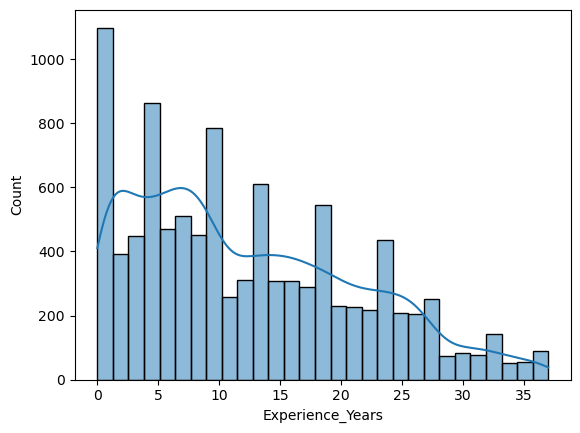

In [129]:
sns.histplot(df['Experience_Years'], kde=True)
plt.show()


- **Experience_Years** 
- The distribution of `Experience_Years` is **right-skewed**.  
- This means most employees in the dataset are **freshers or early-career** (low years of experience).  
- A smaller proportion of employees are **mid-level to senior professionals**.  
- This imbalance may affect salary prediction, since the dataset has more data points for freshers than for highly experienced employees.  


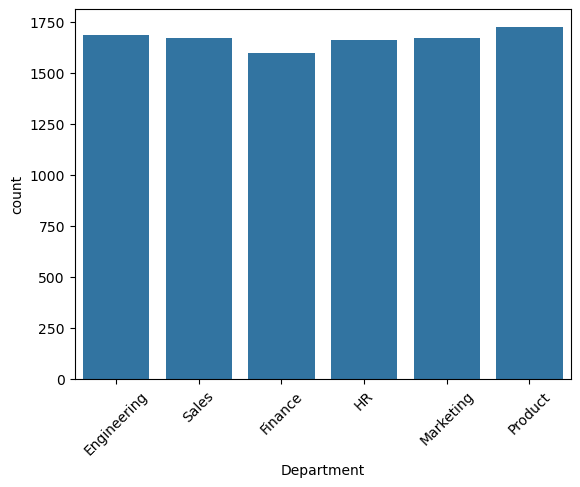

In [132]:
sns.countplot(x='Department', data=df)
plt.xticks(rotation=45)
plt.show()


**Department** 

- The countplot for `Department` shows that most departments have **almost equal representation**.  
- This indicates **no major class imbalance** across departments.  
- A balanced distribution is good for modeling, since the model won’t be biased toward a single department.  



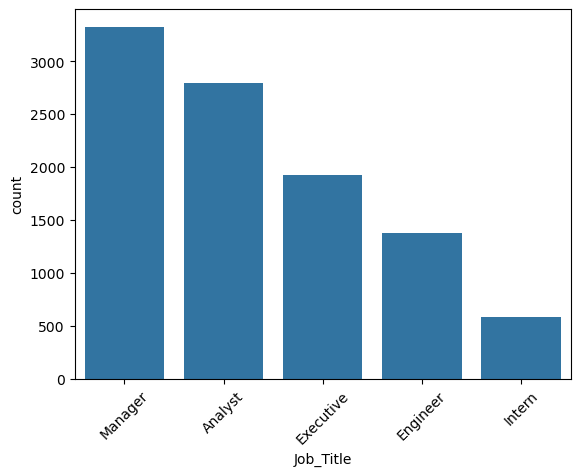

In [137]:
top_titles = df['Job_Title'].value_counts().index  # take all
sns.countplot(data=df, x='Job_Title', order=top_titles)
plt.xticks(rotation=45)
plt.show()


**Job_Title** 


- The countplot for `Job_Title` shows that some titles have **much higher representation** than others.  
- For example, the **Manager** role is the most common, followed by **Analyst**, and then other job titles.  
- This indicates a **moderate imbalance** in job roles.  
- Such imbalance should be considered during modeling, since job title is a strong predictor of salary and over-represented titles may dominate predictions.  


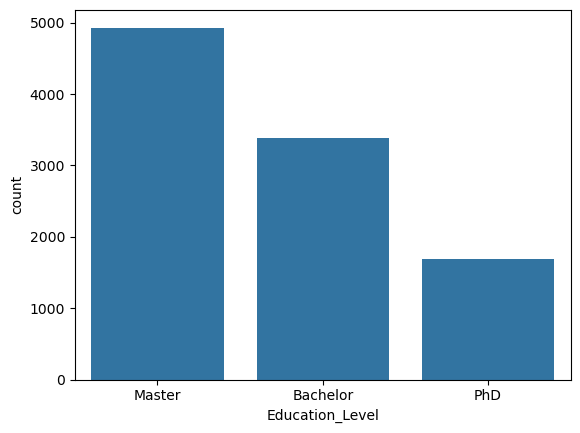

In [138]:
sns.countplot(x='Education_Level', data=df)
plt.show()


 **Education_Level**

- The distribution of `Education_Level` shows that **most employees hold a Master’s degree**, followed by **Bachelor’s degree holders**, and a smaller number with **PhDs**.  
- This indicates that the workforce is primarily at the **postgraduate level**.  
- Higher education levels are generally expected to correspond with **higher salaries**.  
- Since there are fewer PhD employees, their impact on the salary prediction model may be limited compared to Master’s and Bachelor’s.  


# 🔹 Bivariate EDA

(relationship with Salary = target)

## Salary vs Experience_Years 

In [152]:
df[['Experience_Years','Salary']].corr()


,Experience_Years,Salary
Experience_Years,1.000000,0.898025
Salary,0.898025,1.000000


- **Salary vs Experience_Years**
- - The correlation between `Experience_Years` and `Salary` is **0.89**, which indicates a **very strong positive relationship**.  

## Salary vs Department 

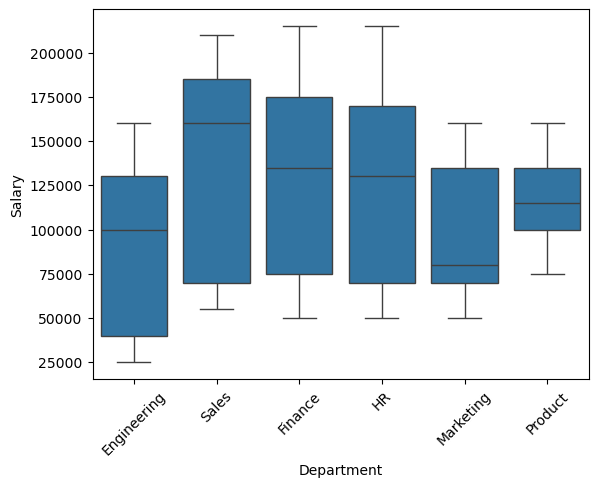

In [141]:
sns.boxplot(x='Department', y='Salary', data=df)
plt.xticks(rotation=45)
plt.show()


 **Salary vs Department**  
 Sales → Median salary is the highest compared to other departments, so Sales employees generally earn more.


## Salary vs Job_Title 

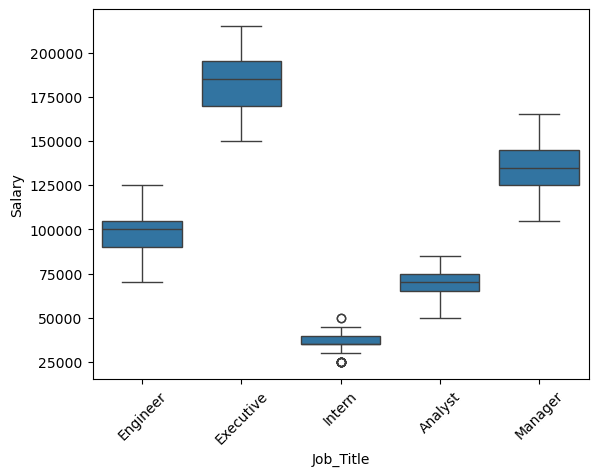

In [143]:
sns.boxplot(x='Job_Title', y='Salary', data=df)
plt.xticks(rotation=45)
plt.show()


**Salary vs Job_Title**  
  -  The boxplot shows clear salary stratification by job title.  
- **Executive and Manager roles** have the **highest median salaries**, indicating they are typically the top-paying positions.    

### Salary vs Education_Level 

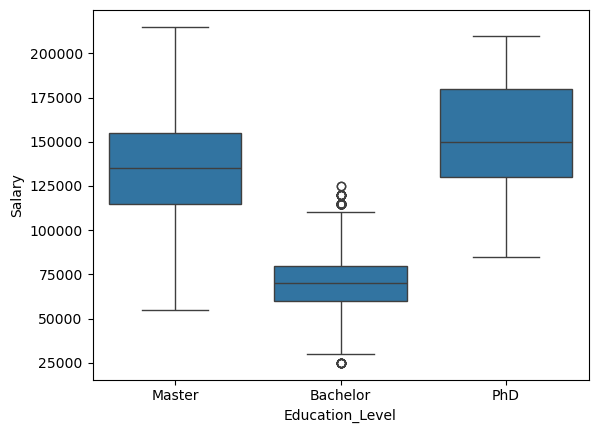

In [160]:
sns.boxplot(x='Education_Level', y='Salary', data=df)
plt.show()


 ### Salary vs Education_Level (Boxplot)

- The boxplot shows how education affects salary.  
- Median salaries follow the expected trend: **PhD > Master’s > Bachelor’s**, indicating higher education generally leads to higher pay.  
- **Bachelor’s group** has several outliers, showing that some employees earn much more than the typical Bachelor’s holder.  
- Spread of salaries is higher for Master’s and PhD, suggesting variability in pay within these education levels.  
- Overall, higher education increases the chance of earning a higher salary, but individual performance and role can create exceptions.


# 🔹 Multivariate EDA

### Salary vs Experience_Years across Education_Level → scatterplot with hue

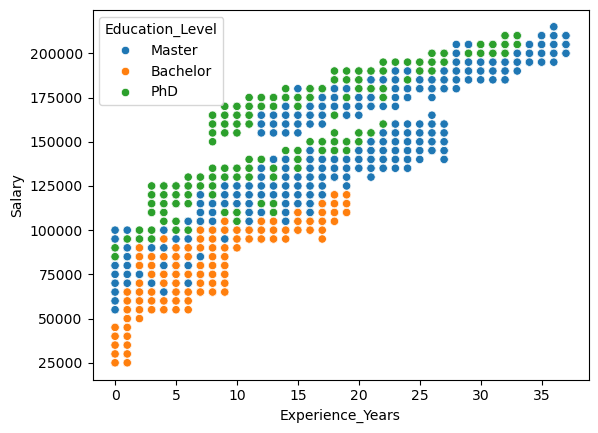

In [145]:
sns.scatterplot(x='Experience_Years', y='Salary', hue='Education_Level', data=df)
plt.show()

 **Salary vs Experience_Years across Education_Level** → Scatterplot with hue.  
- The scatterplot shows the relationship between experience and salary, with color representing education level.  
- Salary **increases with experience** across all education levels.    
- Bachelor’s holders show more salary variation  while PhD salaries are higher and more concentrated.  
- This confirms that **both experience and education are important predictors** for salary.


### Salary distribution across Department + Education_Level → grouped boxplot

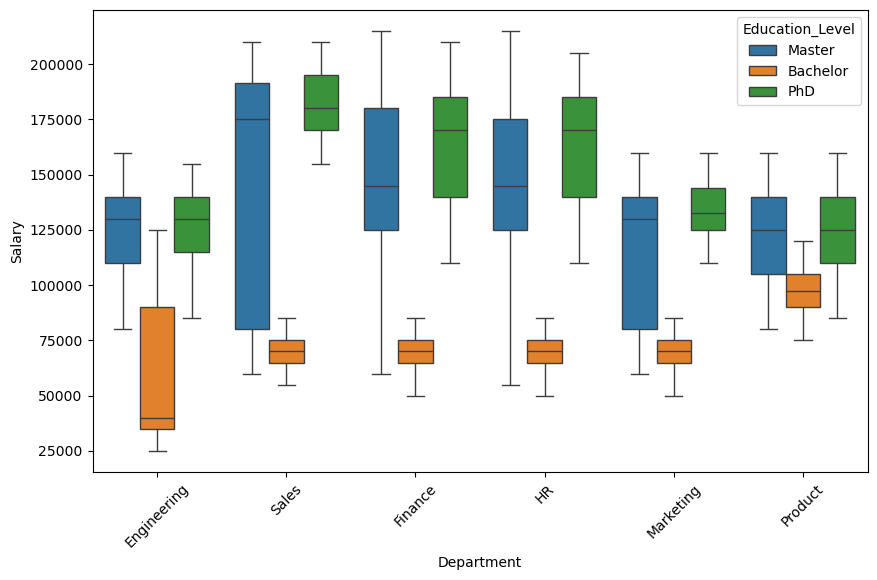

In [146]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Department', y='Salary', hue='Education_Level', data=df)
plt.xticks(rotation=45)
plt.show()


**Salary distribution across Department + Education_Level** → Grouped boxplot.   
Master’s employees in Engineering earn more than Master’s employees in any other department, indicating that department plays a strong role in determining salary.


In [162]:
df.to_csv("employess_cleandata.csv", index=False)
